In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import pickle
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np


### Loading the Data into train and test

In [38]:
pickle_path = 'data/ass3.pickle'
pkl = pickle.load(open(pickle_path, 'rb'))


x_train = pd.DataFrame(pkl['train'][0]) 
y_train = pd.DataFrame(pkl['train'][1]) 

x_test = pd.DataFrame(pkl['dev'][0])
y_test = pd.DataFrame(pkl['dev'][1])


x_test.describe()


# x_train.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.0,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000
mean,15.992245,0.106660,0.733472,10.846695,187.505101,10.284735,0.0,1001.727009,128.815418,15.774198,6.529443,2010.981505,11.491333
std,4.370816,0.324408,0.196547,6.949420,107.005976,4.199114,0.0,123.044761,56.492920,8.822857,3.448200,3.170514,6.895980
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,2006.000000,0.000000
25%,17.000000,0.000000,0.600000,5.892600,118.000000,8.227100,0.0,1011.810000,94.000000,8.000000,4.000000,2008.000000,6.000000
50%,18.000000,0.000000,0.780000,10.014200,180.000000,9.998100,0.0,1016.450000,118.000000,16.000000,7.000000,2011.000000,11.000000
75%,19.000000,0.000000,0.890000,14.135800,290.000000,14.731500,0.0,1021.030000,181.000000,23.000000,10.000000,2014.000000,17.000000
max,26.000000,1.000000,1.000000,63.852600,359.000000,16.100000,0.0,1045.930000,213.000000,31.000000,12.000000,2016.000000,23.000000


In [39]:
models = [
  ('LR', LinearRegression()),
  ('Ridge', Ridge()),
  ('Lasso', Lasso()),
  ('BR', BayesianRidge()),
  ('KNR', KNeighborsRegressor()),
  ('DT', DecisionTreeRegressor()),
  ('RF', RandomForestRegressor()),
  ('GB', GradientBoostingRegressor()),
  ('AB', AdaBoostRegressor()),
  ('VR', VotingRegressor(estimators=
                            [
                              ('gb', GradientBoostingRegressor()),
                              ('rf', RandomForestRegressor()),
                              ('dt', DecisionTreeRegressor()), 
                            ]))
  # ('SVM', SVR())
]

In [40]:
def fit_model(model, x_train, y_train):
  model.fit(x_train, y_train)

# Fitting al the given models
for (name, model) in models:
  fit_model(model, x_train, y_train.values.ravel())

In [41]:
model_names = [model_name for (model_name, model) in models]
models_acc = [model.score(x_test, y_test) for (model_name, model) in models]


### Plotting models results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


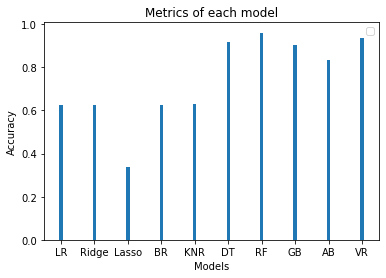

In [42]:
X_axis = np.arange(len(model_names))
  
plt.bar(X_axis, models_acc, 0.1)

plt.xticks(X_axis, model_names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Metrics of each model")
plt.legend()
plt.show()